In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import sys
sys.path.append('..')
import src.util.string_constants as stco
import src.input_generator as inge
import src.util.runtime_util as rtut
import src.util.math_util as maut

# read inputs

In [3]:
file_path_hadrons = '/eos/home-k/kiwoznia/data/rodem/opde/Feb24.pkl'
file_path_photons = '/eos/home-k/kiwoznia/data/rodem/opde/Feb24_photons.pkl'

In [4]:
df_sum = inge.read_photon_hadron_dataframe(file_path_photons, file_path_hadrons, N_layers=30, sum_layers=True)
df_multi = inge.read_photon_hadron_dataframe(file_path_photons, file_path_hadrons, N_layers=30, sum_layers=False)


KeyboardInterrupt



In [ ]:
df_sum

In [ ]:
df_sum.columns

In [ ]:
# photon = 0, hadron = 1
df_sum.pid

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 7,7
df = df_sum[['sum_1L','sum_5L','sum_10L','sum_15L','sum_25L','pid']]
sns.pairplot(df[:200], hue='pid', kind='kde')

In [ ]:
df_multi.columns

In [ ]:
df = df_multi[['E_L1','E_L5','E_L10','E_L15','E_L25','pid']]
sns.pairplot(df[:100], hue='pid', kind='kde')

In [4]:
file_path_multi = '../results/results_MI9_pid_multi_20240418.pkl'
file_path_sum = '../results/results_MI8_pid_sum_20240418.pkl'

In [5]:
df_multi = pd.read_pickle(file_path_multi)

In [6]:
df_sum = pd.read_pickle(file_path_sum)

In [7]:
df_multi

,name,train ml mi,train true mi,test ml mi,test true mi
0,1 layers,0.160566,0.111954,0.154587,0.112640
1,2 layers,0.585103,0.112882,0.594801,0.112273
2,3 layers,0.714608,0.111972,0.735403,0.112560
3,4 layers,0.772674,0.112380,0.782986,0.112577
4,5 layers,0.812742,0.112807,0.808403,0.112396
5,6 layers,0.862648,0.112867,0.846034,0.112187
6,7 layers,0.869175,0.112120,0.871249,0.112622
7,8 layers,0.905378,0.112603,0.901808,0.113047
8,9 layers,0.920599,0.112939,0.916708,0.113176
9,10 layers,0.949301,0.112870,0.958667,0.113253


In [8]:
np.array(df_multi['train ml mi'])

array([0.16056619, 0.58510285, 0.71460798, 0.77267359, 0.81274221,
       0.86264757, 0.86917497, 0.90537809, 0.92059906, 0.94930057,
       0.9635199 , 0.97006703, 0.98365178, 0.99377664, 0.98784708,
       0.98351343, 0.972062  , 0.99742663, 0.99741731, 0.98684192,
       0.97296138, 0.97358522, 0.9927465 , 0.97612954, 0.97561695,
       0.9765889 , 0.98455426, 0.97745739, 0.98247087, 0.96448407])

In [9]:
df_multi.min()[:4]

name             1 layers
train ml mi      0.160566
train true mi    0.111834
test ml mi       0.154587
dtype: object

In [10]:
df_multi.dropna(inplace=True)

In [11]:
df_sum.dropna(inplace=True)

In [12]:
import matplotlib.pyplot as plt

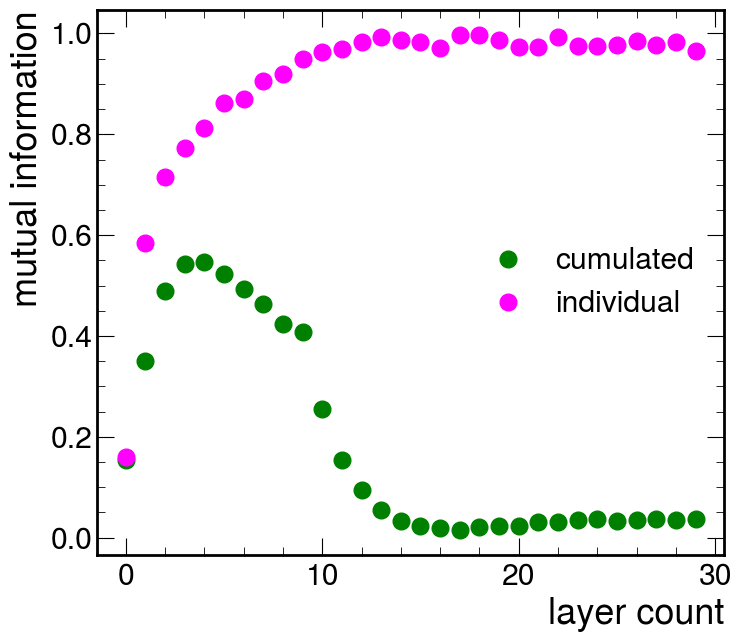

In [16]:
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.figure(figsize=(8,7))
plt.plot(df_sum['train ml mi'],'o',markersize=12,label='cumulated',color='green')
plt.plot(df_multi['train ml mi'],'o',markersize=12,label='individual',color='magenta')
plt.legend()
plt.xlabel('layer count')
plt.ylabel('mutual information')
plt.tight_layout()

Text(0, 0.5, 'MI layer multi')

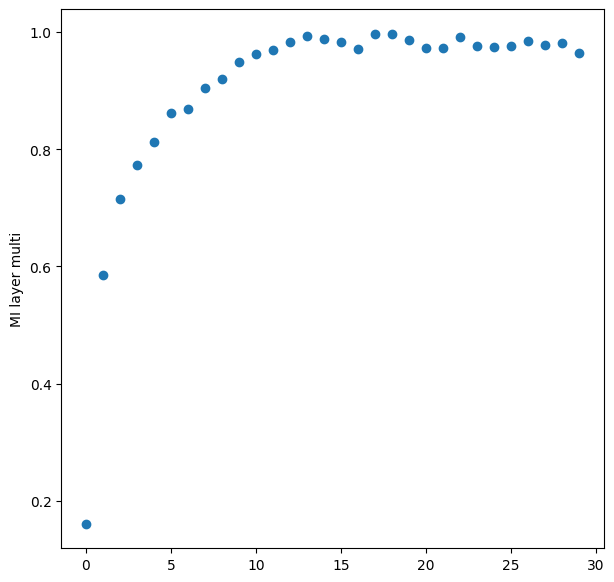

In [23]:
plt.figure()
plt.plot(df_multi['train ml mi'],'o')
plt.ylabel('MI layer multi')

Text(0.5, 0, 'num layers (split)')

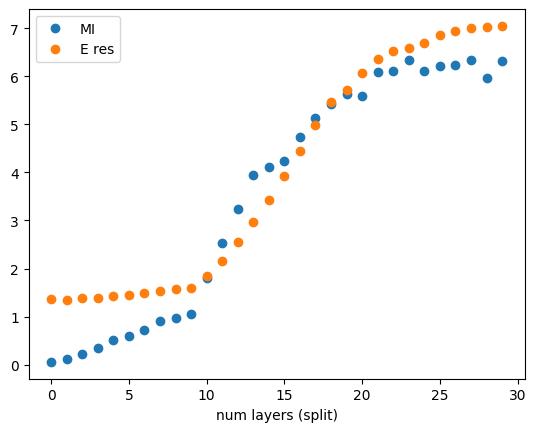

In [11]:
plt.figure()
plt.plot(2.8*df_multi['test ml mi'],'o', label='MI')
plt.plot(1./df_sum['test E res'],'o', label='E res')
plt.legend()
plt.xlabel('num layers (split)')

Text(0.5, 0, 'num layers')

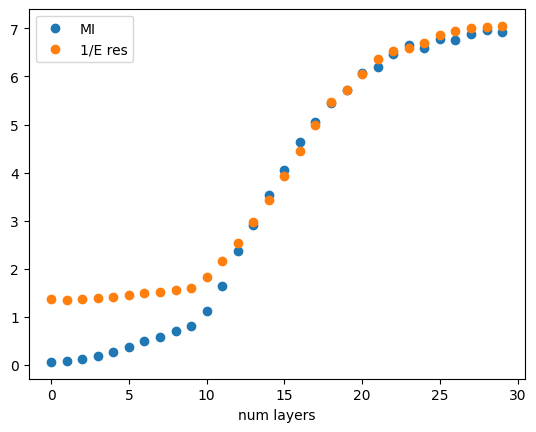

In [14]:
plt.figure()
plt.plot(3.*df_sum['test ml mi'],'o', label='MI')
plt.plot(1./df_sum['test E res'],'o',  label='1/E res')
plt.legend()
plt.xlabel('num layers (sum)')

In [11]:
df_sum

,name,train ml mi,train appr mi,train true mi,test ml mi,test appr mi,test true mi,train E res,test E res
0,1 layers sum,0.020130,-1.631613,0.026258,0.021642,-0.410284,0.020028,0.727349,0.731050
1,2 layers sum,0.029472,-1.627691,0.028642,0.026554,-0.436578,0.028573,0.739772,0.742155
2,3 layers sum,0.047718,-1.197309,0.035475,0.039670,-0.437325,0.036315,0.722721,0.723632
3,4 layers sum,0.075125,-0.477836,0.057147,0.064874,-0.441197,0.053782,0.721404,0.721566
4,5 layers sum,0.104643,-0.425947,0.080755,0.091624,-0.483911,0.073189,0.703575,0.702954
5,6 layers sum,0.132022,-0.517002,0.099020,0.127851,-0.416290,0.100212,0.687784,0.687390
6,7 layers sum,0.167054,-0.398100,0.127282,0.166531,-0.534562,0.126800,0.672920,0.672105
7,8 layers sum,0.210821,-0.376813,0.145383,0.196863,-0.697146,0.144843,0.654850,0.654722
8,9 layers sum,0.245780,-0.357308,0.173218,0.236910,-0.659544,0.166252,0.639072,0.638981
9,10 layers sum,0.267643,-0.342078,0.193020,0.269388,-0.588752,0.182873,0.626224,0.626368
